<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/DSP_CSE_3209_Theory_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

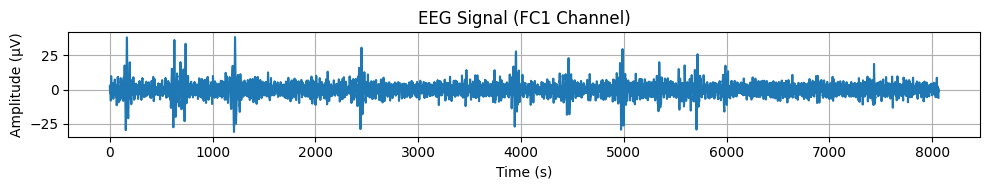

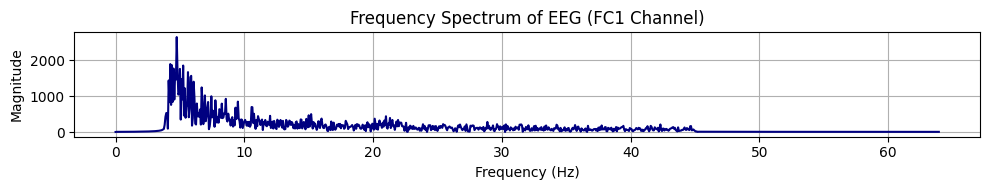

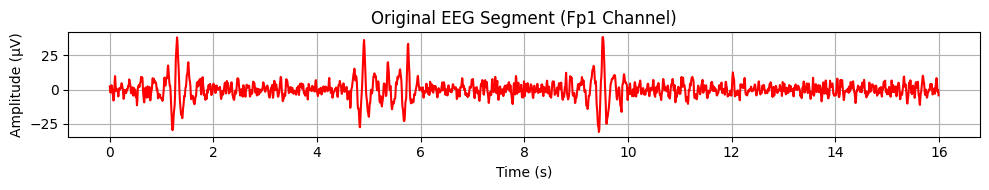

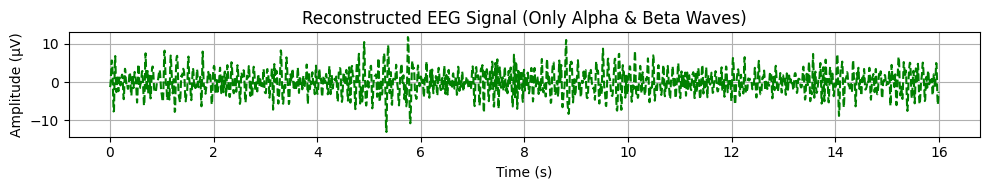

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

signal_url = 'https://raw.githubusercontent.com/Niger49/CSE3210_DSP/main/EEG_features_raw.csv'
EEG_data = pd.read_csv(signal_url)

EEG_channel = EEG_data["FC1"]

fs = 128
length = 2048
t = np.arange(length) / fs
EEG_signal = EEG_channel[:length]

spctrm = fft(EEG_signal)
freq = fftfreq(length, 1/fs)

filtered_spectrum = np.zeros_like(spctrm, dtype=complex)

for i, f in enumerate(freq):
    if 8 <= abs(f) <= 30:
        filtered_spectrum[i] = spctrm[i]

reconstructed_signal = ifft(filtered_spectrum).real

plt.figure(figsize=(10, 2))
plt.plot(EEG_channel)
plt.title("EEG Signal (FC1 Channel)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(freq[:length//2], np.abs(spctrm[:length//2]), color='navy')
plt.title("Frequency Spectrum of EEG (FC1 Channel)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(t, EEG_signal, label='Original Signal', color='red')
plt.title("Original EEG Segment (Fp1 Channel)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(t, reconstructed_signal, label='Alpha & Beta Only', color='green', linestyle='--')
plt.title("Reconstructed EEG Signal (Only Alpha & Beta Waves)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.grid(True)
plt.tight_layout()
plt.show()
